<a href="https://colab.research.google.com/github/jpsicilia/students_social_media_addiction/blob/main/students_social_media_addiction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("Students Social Media Addiction.csv")

In [4]:
# Primer vistazo
print(df.head())
print(df.info())
print(df.describe())

# Verificar datos nulos
print(df.isnull().sum())

   Student_ID  Age  Gender Academic_Level     Country  Avg_Daily_Usage_Hours  \
0           1   19  Female  Undergraduate  Bangladesh                    5.2   
1           2   22    Male       Graduate       India                    2.1   
2           3   20  Female  Undergraduate         USA                    6.0   
3           4   18    Male    High School          UK                    3.0   
4           5   21    Male       Graduate      Canada                    4.5   

  Most_Used_Platform Affects_Academic_Performance  Sleep_Hours_Per_Night  \
0          Instagram                          Yes                    6.5   
1            Twitter                           No                    7.5   
2             TikTok                          Yes                    5.0   
3            YouTube                           No                    7.0   
4           Facebook                          Yes                    6.0   

   Mental_Health_Score Relationship_Status  Conflicts_Over_Soc

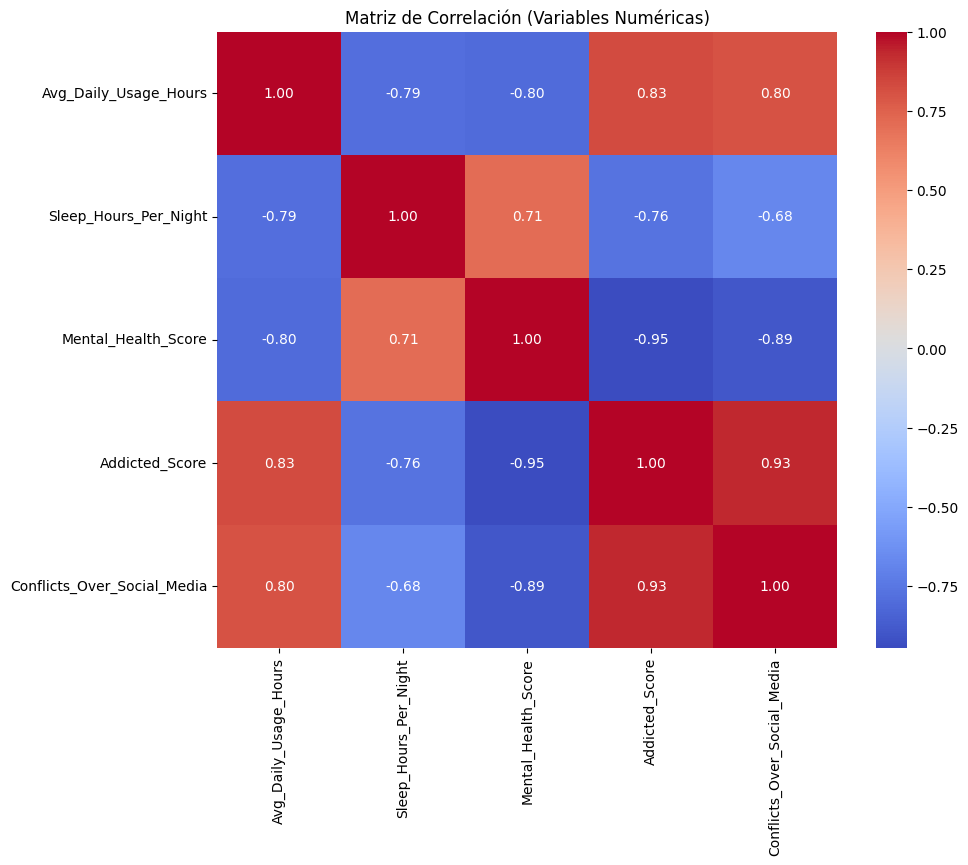

In [15]:
# Distribución de variables numéricas
num_cols =df[ ['Avg_Daily_Usage_Hours', 'Sleep_Hours_Per_Night',
            'Mental_Health_Score', 'Addicted_Score', 'Conflicts_Over_Social_Media']]
# Calcular matriz de correlación
corr_matrix = num_cols.corr()

# Visualizar
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación (Variables Numéricas)')
plt.show()

In [16]:
df.groupby('Most_Used_Platform')['Addicted_Score'].mean().sort_values(ascending=False)

,Addicted_Score
Most_Used_Platform,
WhatsApp,7.462963
Snapchat,7.461538
TikTok,7.428571
Instagram,6.554217
YouTube,6.100000
WeChat,6.066667
KakaoTalk,6.000000
Facebook,5.666667
Twitter,5.500000


<Axes: xlabel='Most_Used_Platform'>

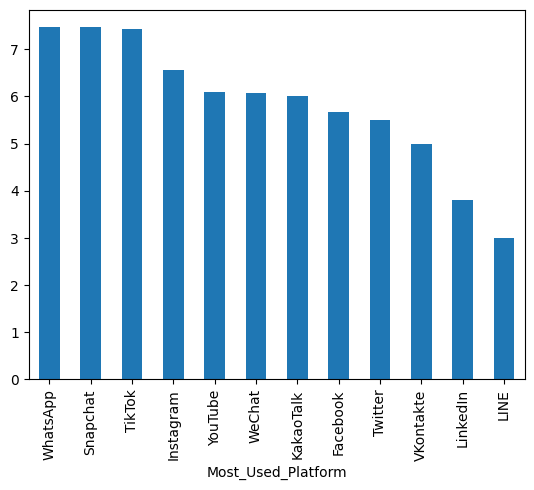

In [17]:
df.groupby('Most_Used_Platform')['Addicted_Score'].mean().sort_values(ascending=False).plot(kind='bar')

<Axes: ylabel='count'>

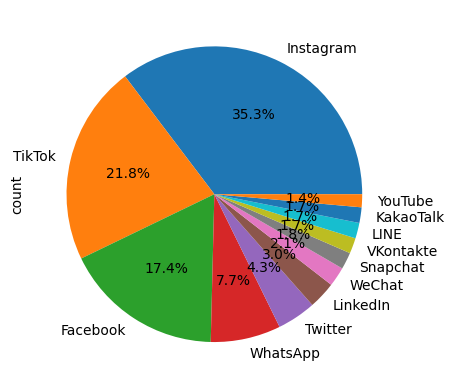

In [22]:
df["Most_Used_Platform"].value_counts().plot(kind='pie', autopct='%1.1f%%')

Promedio de conflictos por estado de relación:
Relationship_Status
Complicated        3.031250
Single             2.901042
In Relationship    2.761246
Name: Conflicts_Over_Social_Media, dtype: float64


<ipython-input-23-691a513a8c9d>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conflictos_por_relacion.index, y=conflictos_por_relacion.values, palette="viridis")


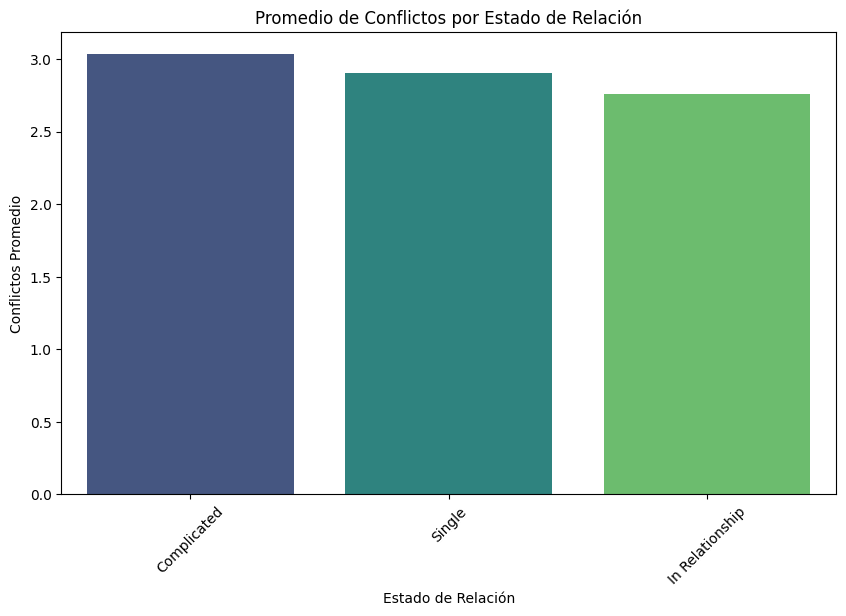

In [23]:
# Agrupar por estado de relación y calcular el promedio de conflictos
conflictos_por_relacion = df.groupby('Relationship_Status')['Conflicts_Over_Social_Media'].mean().sort_values(ascending=False)

# Mostrar resultados
print("Promedio de conflictos por estado de relación:")
print(conflictos_por_relacion)

# Gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=conflictos_por_relacion.index, y=conflictos_por_relacion.values, palette="viridis")
plt.title("Promedio de Conflictos por Estado de Relación")
plt.xlabel("Estado de Relación")
plt.ylabel("Conflictos Promedio")
plt.xticks(rotation=45)
plt.show()


Promedio de horas diarias en redes por estado de relación:
Relationship_Status
In Relationship    4.930796
Single             4.926042
Complicated        4.721875
Name: Avg_Daily_Usage_Hours, dtype: float64


<ipython-input-24-3a51d21758a2>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=horas_por_relacion.index, y=horas_por_relacion.values, palette="magma")


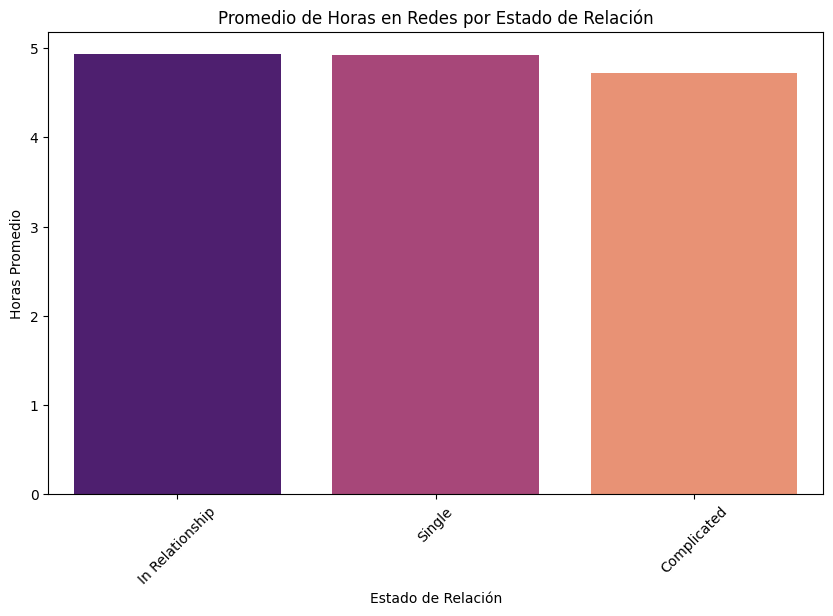

In [24]:
# Agrupar por estado de relación y calcular el promedio de horas de uso
horas_por_relacion = df.groupby('Relationship_Status')['Avg_Daily_Usage_Hours'].mean().sort_values(ascending=False)

# Mostrar resultados
print("\nPromedio de horas diarias en redes por estado de relación:")
print(horas_por_relacion)

# Gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=horas_por_relacion.index, y=horas_por_relacion.values, palette="magma")
plt.title("Promedio de Horas en Redes por Estado de Relación")
plt.xlabel("Estado de Relación")
plt.ylabel("Horas Promedio")
plt.xticks(rotation=45)
plt.show()

<ipython-input-25-ff96ee13438f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Relationship_Status', y='Conflicts_Over_Social_Media', palette="pastel")


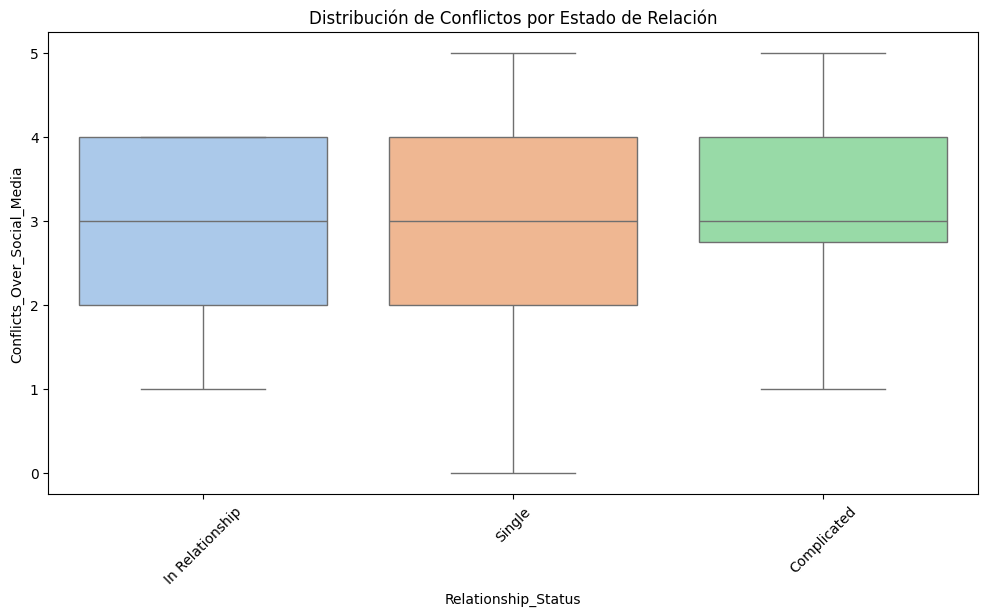

<ipython-input-25-ff96ee13438f>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Relationship_Status', y='Avg_Daily_Usage_Hours', palette="coolwarm")


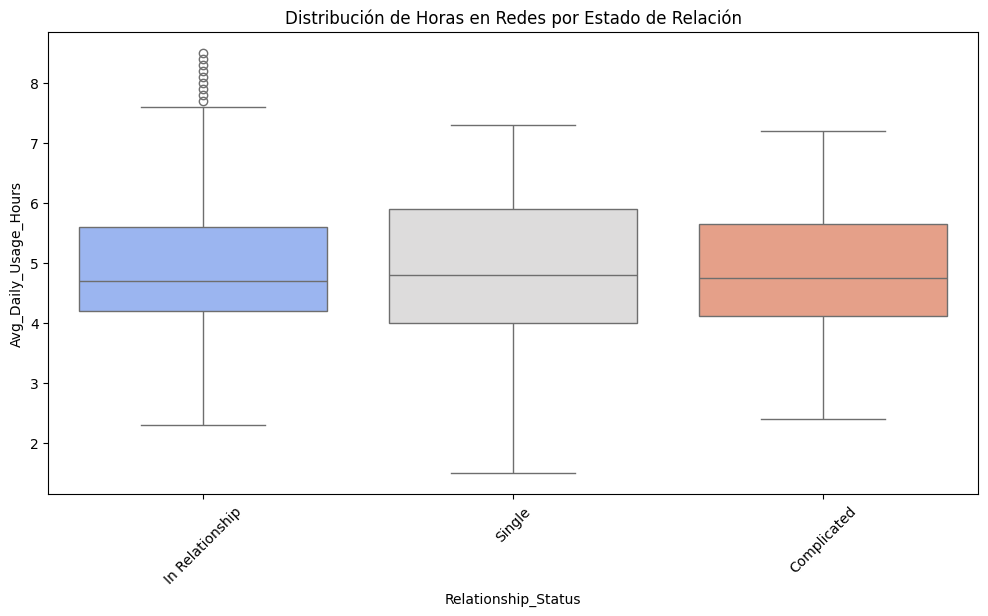

In [25]:
# Conflictos
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Relationship_Status', y='Conflicts_Over_Social_Media', palette="pastel")
plt.title("Distribución de Conflictos por Estado de Relación")
plt.xticks(rotation=45)
plt.show()

# Horas de uso
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Relationship_Status', y='Avg_Daily_Usage_Hours', palette="coolwarm")
plt.title("Distribución de Horas en Redes por Estado de Relación")
plt.xticks(rotation=45)
plt.show()

In [26]:
from scipy.stats import f_oneway

# ANOVA para conflictos
grupos_conflictos = [df[df['Relationship_Status'] == grupo]['Conflicts_Over_Social_Media']
                     for grupo in df['Relationship_Status'].unique()]
f_val, p_val = f_oneway(*grupos_conflictos)
print(f"ANOVA para Conflictos: p-value = {p_val:.4f}")

# Interpretación: p < 0.05 indica diferencias significativas.

ANOVA para Conflictos: p-value = 0.0945


In [27]:
# Medias de conflictos por grupo
print(df.groupby('Relationship_Status')['Conflicts_Over_Social_Media'].mean())

# Salida esperada (ejemplo):
# Single          2.8
# In Relationship 3.1
# Complicated     3.4

Relationship_Status
Complicated        3.031250
In Relationship    2.761246
Single             2.901042
Name: Conflicts_Over_Social_Media, dtype: float64
